In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('World-Stock-Prices-Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-16 00:00:00-04:00,6.320000,6.435400,6.220000,6.340000,12087274.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-16 00:00:00-04:00,118.070000,118.239998,116.010002,117.169998,42968300.0,0.0,0.0,amd,AMD,technology,usa,NaN
2,2025-05-16 00:00:00-04:00,10.050000,10.220000,10.010000,10.200000,5015027.0,0.0,0.0,zoominfo,ZI,technology,usa,NaN
3,2025-05-16 00:00:00-04:00,71.860001,72.260002,71.430000,72.000000,18426600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
4,2025-05-16 00:00:00-04:00,1193.140015,1196.500000,1179.390015,1191.530029,4683800.0,0.0,0.0,netflix,NFLX,entertainment,usa,NaN


In [134]:
stock_symbols = 'AAPL'

df1 = df[df['Ticker'] == stock_symbols].sort_index(ascending=False)
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
307787,2000-01-03 00:00:00-05:00,0.794800,0.852586,0.770643,0.848323,535796800.0,0.0,0.0,apple,AAPL,technology,usa,NaN
307746,2000-01-04 00:00:00-05:00,0.820377,0.838376,0.766854,0.776801,512377600.0,0.0,0.0,apple,AAPL,technology,usa,NaN
307717,2000-01-05 00:00:00-05:00,0.786273,0.837902,0.780590,0.788168,778321600.0,0.0,0.0,apple,AAPL,technology,usa,NaN
307682,2000-01-06 00:00:00-05:00,0.804273,0.810904,0.719961,0.719961,767972800.0,0.0,0.0,apple,AAPL,technology,usa,NaN
307632,2000-01-07 00:00:00-05:00,0.731329,0.765433,0.723751,0.754065,460734400.0,0.0,0.0,apple,AAPL,technology,usa,NaN


In [135]:
df1 = df1.reset_index()['Close']
df1.head()

0    0.848323
1    0.776801
2    0.788168
3    0.719961
4    0.754065
Name: Close, dtype: float64

Text(0.5, 1.0, 'AAPL Stock Prices')

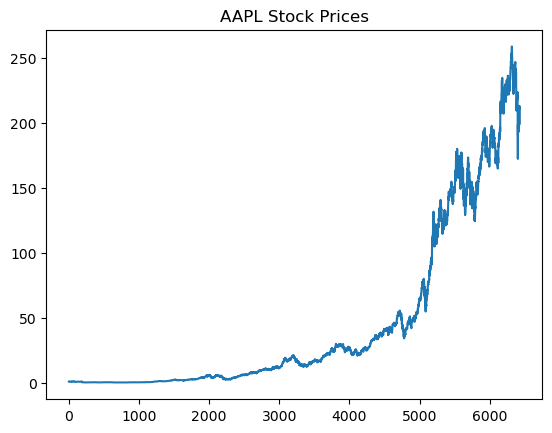

In [136]:

plt.plot(df1)
plt.title('AAPL Stock Prices')


In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [138]:
df1

array([[0.00250931],
       [0.00223297],
       [0.00227689],
       ...,
       [0.81620514],
       [0.81547104],
       [0.81547104]])

In [139]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [140]:
training_size,test_size

(4179, 2251)

In [141]:
train_data

array([[0.00250931],
       [0.00223297],
       [0.00227689],
       ...,
       [0.09667286],
       [0.09594746],
       [0.09588479]])

In [142]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [143]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [144]:
print(X_train.shape), print(y_train.shape)

(4078, 100)
(4078,)


(None, None)

In [145]:
print(X_test.shape), print(ytest.shape)

(2150, 100)
(2150,)


(None, None)

In [146]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [147]:
X_train.shape, X_test.shape

((4078, 100, 1), (2150, 100, 1))

In [148]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
model = Sequential()

In [149]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


d:\master program\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model fitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, ytest), callbacks=[early_stop])

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 4.7261e-04 - val_loss: 0.0053
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0057e-05 - val_loss: 0.0060
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.1639e-05 - val_loss: 0.0039
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1.8850e-05 - val_loss: 0.0079
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.8633e-05 - val_loss: 0.0076
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.8940e-05 - val_loss: 0.0102
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.9668e-05 - val_loss: 0.0063
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 1.8404e-05 - val_loss: 0.0080
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1.6581e-05 - val_loss: 0.0064
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1.6711e-05 - val_loss: 0.0110
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 1.4590e-05 - val_loss: 0.0078
Epoch 12

In [153]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [154]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [155]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

12.04317822038565

In [156]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, train_predict)
print(f'MAE: {mae}')

MAE: 8.265844880306933


In [157]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

122.5261758805241

In [158]:
mae = mean_absolute_error(ytest, test_predict)
print(f'MAE: {mae}')

MAE: 109.0022001182176


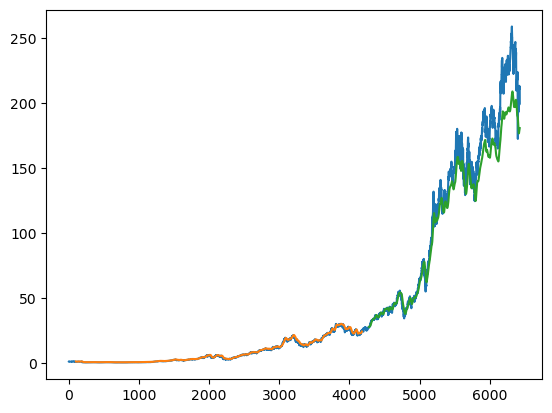

In [159]:
### Plotting 
import matplotlib.pyplot as plt
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

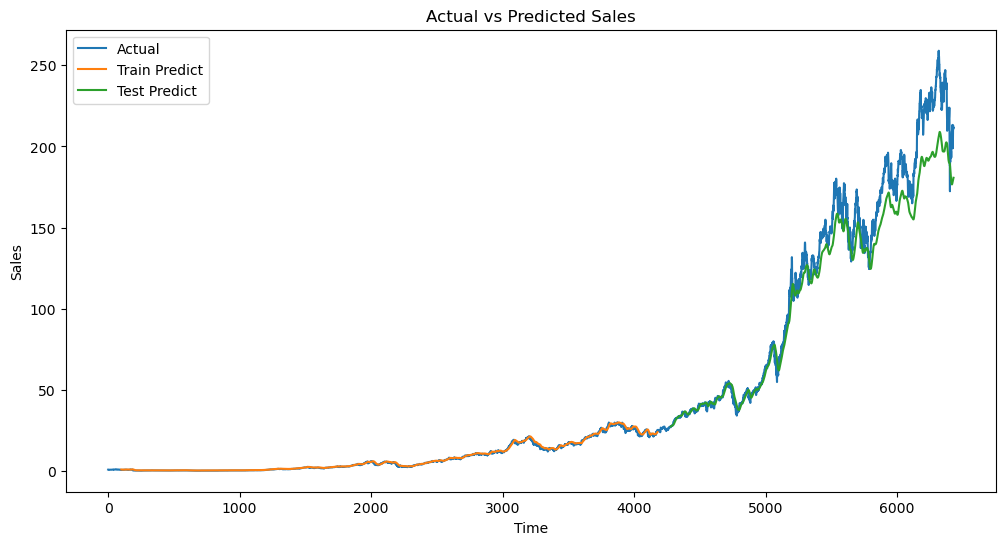

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label='Actual')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [161]:
len(test_data)

2251

In [162]:
x_input=test_data[2151:].reshape(1,-1)
x_input.shape

(1, 100)

In [163]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [164]:
temp_input

[0.9143424530452079,
 0.9048764089569444,
 0.900549114942853,
 0.9182833562559157,
 0.8811534639211922,
 0.887798984845666,
 0.887798984845666,
 0.8594396449441075,
 0.8640374243115592,
 0.8633806071097742,
 0.8599805566958689,
 0.8599805566958689,
 0.8873353630455734,
 0.919790186061177,
 0.924040249078559,
 0.917201532752393,
 0.9110583080813256,
 0.9110583080813256,
 0.8801875458676925,
 0.8986945687875223,
 0.8974195498823077,
 0.9003173040428065,
 0.8787193905157452,
 0.8787193905157452,
 0.8787966215124546,
 0.8979990771324238,
 0.9144196840419173,
 0.9324244107083405,
 0.9442859127036961,
 0.9442859127036961,
 0.9437836164502895,
 0.9453290617539052,
 0.9490382130195257,
 0.9479563895160029,
 0.9479563895160029,
 0.9539450932386924,
 0.9537132233836867,
 0.9279039212925574,
 0.9160810937505155,
 0.9336221396618866,
 0.9336221396618866,
 0.9189015579593457,
 0.9107878227279652,
 0.9100537745294714,
 0.9084696547725417,
 0.9229198100766813,
 0.9229198100766813,
 0.8781398043106697

In [165]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=100
i=0
n_days=30
while(i<n_days):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        # reshape from [1,100] into [1,100,1]
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6999261]
101
1 day input [0.90487641 0.90054911 0.91828336 0.88115346 0.88779898 0.88779898
 0.85943964 0.86403742 0.86338061 0.85998056 0.85998056 0.88733536
 0.91979019 0.92404025 0.91720153 0.91105831 0.91105831 0.88018755
 0.89869457 0.89741955 0.9003173  0.87871939 0.87871939 0.87879662
 0.89799908 0.91441968 0.93242441 0.94428591 0.94428591 0.94378362
 0.94532906 0.94903821 0.94795639 0.94795639 0.95394509 0.95371322
 0.92790392 0.91608109 0.93362214 0.93362214 0.91890156 0.91078782
 0.91005377 0.90846965 0.92291981 0.92291981 0.8781398  0.85248502
 0.83757125 0.80936643 0.82408707 0.82408707 0.82605752 0.82099612
 0.83084849 0.82644391 0.84255542 0.84255542 0.85206002 0.86372832
 0.85515097 0.86411471 0.84112582 0.84112582 0.85746919 0.86156468
 0.86426924 0.78429123 0.72707026 0.72707026 0.66540602 0.76752291
 0.73495212 0.76481829 0.76481829 0.78170258 0.78023436 0.74982728
 0.7602978  0.7602978  0.7455386  0.77096157 0.78973902 0.80430503
 0.80782098 0.80782098 0.81114374 

In [166]:
day_new=np.arange(1,n_steps+1)
day_pred=np.arange(n_steps+1,n_steps+n_days+1)

In [167]:
lendf1 = len(df1)

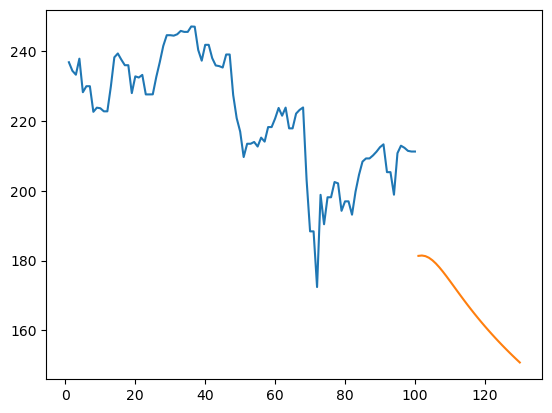

In [168]:
plt.plot(day_new,scaler.inverse_transform(df1[lendf1-n_steps:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

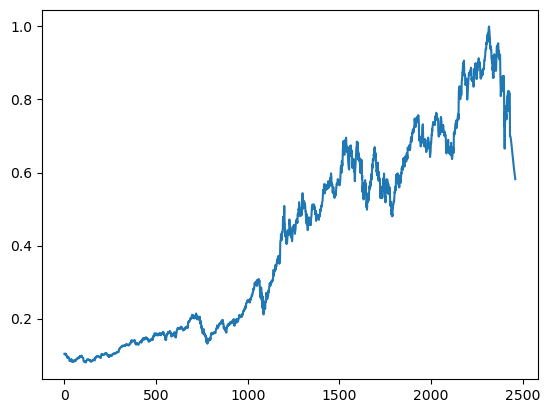

In [180]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4000:])

In [181]:
df3=scaler.inverse_transform(df3).tolist()

In [189]:
import plotly.express as px
px.line(data_frame=df3[4000:], title='Predicted Stock Price')

# plt.plot(df3[4000:])